In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE,ADASYN,BorderlineSMOTE,SVMSMOTE,RandomOverSampler  
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score,auc, roc_auc_score, accuracy_score,roc_curve,average_precision_score, classification_report,precision_recall_curve
from collections import Counter
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

# Classifier Libraries
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv',encoding="utf-8",low_memory=False )
print("The shape of :", data.shape)

The shape of : (284807, 31)


In [30]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [31]:
# Good No Null Values!
data.isnull().sum().max()

0

In [32]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

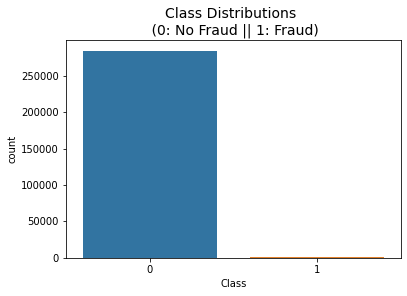

In [33]:
sns.countplot('Class', data=data)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [34]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [35]:
new_data=pd.concat([data]).drop_duplicates(keep=False)

In [36]:
new_data['Class'].value_counts()

0    282493
1       460
Name: Class, dtype: int64

In [37]:
new_data.reset_index()

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282948,284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
282949,284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
282950,284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
282951,284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [38]:
dataFalse=new_data[new_data['Class']==1]

In [39]:
dataTrue=new_data[new_data['Class']==0]

In [40]:
df_split = np.array_split(dataTrue, 5)

In [41]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

scaler = StandardScaler()

#data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
#data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

#data.drop(['Time','Amount'], axis=1, inplace=True)

In [43]:
X = data.drop('Class', axis=1)
Y = data['Class']
X = scaler.fit_transform(X)
Y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Splitting the dataset :

In [44]:
# Split train into train-test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [45]:
print("The shape of : x_test,y_test,x_train,y_train ",X_test.shape,y_test.shape,X_train.shape,y_train.shape)

The shape of : x_test,y_test,x_train,y_train  (56962, 30) (56962,) (227845, 30) (227845,)


###UnderSampler Model :

In [46]:
# Randomly under sample the majority class
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)
# Check the number of records after under sampling
print(sorted(Counter(y_train_rus).items()))

[(0, 394), (1, 394)]


              precision    recall  f1-score   support

           0   0.999872  0.961610  0.980368     56864
           1   0.040018  0.928571  0.076728        98

    accuracy                       0.961553     56962
   macro avg   0.519945  0.945091  0.528548     56962
weighted avg   0.998221  0.961553  0.978813     56962

0.950507614213198
0.9615533162459183
Specificity :  0.9285714285714286


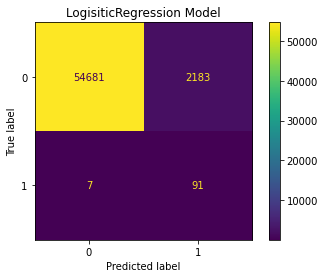

The shape of : (284807, 31)


In [47]:
# Train the LogisiticRegression model
logreg = LogisticRegression()
logreg.fit(X_train_rus, y_train_rus)
y_pred1 = logreg.predict(X_test)

# Check the model performance
print(classification_report(y_test, y_pred1,digits=6))

# Check scores
print (logreg.score(X_train_rus, y_train_rus))
print(logreg.score(X_test,y_test))

# Check specificity
from sklearn import metrics
specificity = metrics.recall_score(y_test, y_pred1, pos_label=1)
print('Specificity : ', specificity)

#Confusion Matrix visualization
plot_confusion_matrix(logreg, X_test, y_test)  
plt.title('LogisiticRegression Model')
plt.show()

print("The shape of :", data.shape)

###DecisionTree Model :

              precision    recall  f1-score   support

           0   0.999836  0.964740  0.981975     56864
           1   0.042502  0.908163  0.081204        98

    accuracy                       0.964643     56962
   macro avg   0.521169  0.936452  0.531590     56962
weighted avg   0.998189  0.964643  0.980425     56962

0.9416243654822335
0.9646430953969313
Specificity :  0.9081632653061225


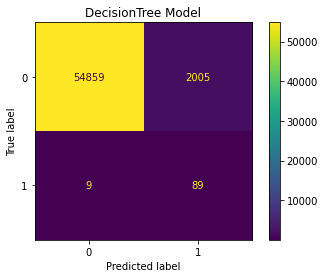

In [48]:
# Train Decision Tree Classifer
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train_rus,y_train_rus)
y_pred2 = clf.predict(X_test)

# Check the model performance
print(classification_report(y_test, y_pred2,digits=6))

# Check scores
print (clf.score(X_train_rus, y_train_rus))
print(clf.score(X_test,y_test))

# Check specificity
from sklearn import metrics
specificity = metrics.recall_score(y_test, y_pred2, pos_label=1)
print('Specificity : ', specificity)

#Confusion Matrix visualization
plot_confusion_matrix(clf, X_test, y_test)  
plt.title('DecisionTree Model')
plt.show()

###KNearest Model :

              precision    recall  f1-score   support

           0   0.999855  0.967853  0.983594     56864
           1   0.046924  0.918367  0.089286        98

    accuracy                       0.967768     56962
   macro avg   0.523389  0.943110  0.536440     56962
weighted avg   0.998215  0.967768  0.982055     56962

0.9593908629441624
0.9677679856746603
Specificity :  0.9183673469387755


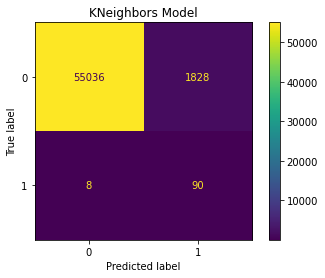

In [49]:
# Train KNeighbors Classifer
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_rus, y_train_rus)
y_pred3 = knn.predict(X_test)

# Check the model performance
print(classification_report(y_test, y_pred3,digits=6))

# Check scores
print (knn.score(X_train_rus,y_train_rus))
print(knn.score(X_test,y_test))

# Check specificity
from sklearn import metrics
specificity = metrics.recall_score(y_test, y_pred3, pos_label=1)
print('Specificity : ', specificity)

#Confusion Matrix visualization
plot_confusion_matrix(knn, X_test, y_test)  
plt.title('KNeighbors Model')
plt.show()